<a href="https://colab.research.google.com/github/rajni0829/Vgg16-Transfer-Learning/blob/master/Vgg_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
! pip install --upgrade pip setuptools wheel
! pip install pandas 
! pip install numpy tensorflow
! pip install split-folders
!pip install torch===1.4.0 torchvision===0.5.0 -f https://download.pytorch.org/whl/torch_stable.html


     |████████████████████████████████| 1.7 MB 5.1 MB/s 
     |████████████████████████████████| 952 kB 56.7 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 753.4 MB 7.2 kB/s            
     |████████████████████████████████| 4.0 MB 46.3 MB/s            
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.4.0 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.4.0 which is incompatible.


In [9]:

# Importing Required Libraries
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.applications.vgg16 import VGG16

In [10]:
# Splitting Dataset
import splitfolders
input_dir = "/content/drive/MyDrive/dataset"
output_dir = "/content/drive/MyDrive/SplittedDataset"

splitfolders.ratio(input_dir, output_dir, seed=1337, ratio=(.8,.2), group_prefix=None)


Copying files: 315 files [01:55,  2.73 files/s]


In [11]:
train_dir = "/content/drive/MyDrive/SplittedDataset/train"
valid_dir = "/content/drive/MyDrive/SplittedDataset/val"
img_width, img_height = 224, 224  # Default input size for VGG16

# Instantiate convolutional base
model_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(img_width, img_height, 3))

# Show architecture
model_base.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [12]:
# Extracting features
!pip install Pillow

import os, shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# To augment dataset by either rescaling or flipping
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count,6))
    
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='categorical')
    
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:            #(inputs_batch, labels_batch : images,category)
        features_batch = model_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
#         print(batch_size, sample_count)
    return features, labels
    
train_features, train_labels = extract_features(train_dir, 251)  # Agree with our small dataset size
validation_features, validation_labels = extract_features(valid_dir, 64)

Found 251 images belonging to 6 classes.
Found 127 images belonging to 6 classes.


In [13]:
for i in train_labels:
  print(i)

[0. 0. 0. 1. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]


In [14]:
train_features


array([[[[0.08102074, 0.        , 0.        , ..., 0.        ,
          0.56776315, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.07524399,
          0.86391068, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.26745483,
          1.00330234, 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          1.02478433, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          1.14134681, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          1.11813092, 0.        ]],

        [[0.10270022, 0.        , 0.        , ..., 0.        ,
          0.40517974, 0.        ],
         [0.52627915, 0.        , 0.72160459, ..., 0.18296987,
          0.5546208 , 0.        ],
         [0.61638284, 0.        , 0.60985178, ..., 0.3976039 ,
          0.70670694, 0.        ],
         ...,
         [1.03391743, 0.        , 0.        , ..., 0.        ,
          0.90445954, 0. 

In [15]:
validation_labels


array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0.

In [26]:
epochs = 150

model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=(7,7,512)))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 3,078
Trainable params: 3,078
Non-trainable params: 0
_________________________________________________________________


In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  

# Compile model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['acc'])

start = datetime.now()

# Train model
history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    callbacks=[checkpoint],
                    validation_data=(validation_features, validation_labels))

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/150
1/8 [==>...........................] - ETA: 2s - loss: 0.1326 - acc: 1.0000
Epoch 00001: val_loss improved from inf to 0.17494, saving model to model-001-0.992032-0.984375.h5
8/8 [==============================] - 1s 29ms/step - loss: 0.1691 - acc: 0.9920 - val_loss: 0.1749 - val_acc: 0.9844
Epoch 2/150
1/8 [==>...........................] - ETA: 0s - loss: 0.1578 - acc: 1.0000
Epoch 00002: val_loss did not improve from 0.17494
8/8 [==============================] - 0s 10ms/step - loss: 0.1637 - acc: 0.9960 - val_loss: 0.1759 - val_acc: 0.9844
Epoch 3/150
1/8 [==>...........................] - ETA: 0s - loss: 0.1474 - acc: 1.0000
Epoch 00003: val_loss improved from 0.17494 to 0.17136, saving model to model-003-0.996016-0.984375.h5
8/8 [==============================] - 0s 15ms/step - loss: 0.1599 - acc: 0.9960 - val_loss: 0.1714 - val_acc: 0.9844
Epoch 4/150
7/8 [=========================>....] - ETA: 0s - loss: 0.1544 - acc: 0.9955
Epoch 00004: val_loss improved from 0.171

In [18]:
from keras.preprocessing import image
def prediction(img_path):
    org_img = image.load_img(img_path)
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
    img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
    plt.imshow(org_img)                           
    plt.axis('off')
    plt.show()

    # Extract features
    features = model_base.predict(img_tensor.reshape(1,img_width, img_height, 3))

    # Make prediction
    try:
        prediction = model.predict(features)
    except:
        prediction = model.predict(features.reshape(1, 7*7*512))
        
    classes = ["ant", "budhha", "dolphin", "elephant", "flamingo", "rooster"]
    print("This Image is of a... "+str(classes[np.argmax(np.array(prediction[0]))]))

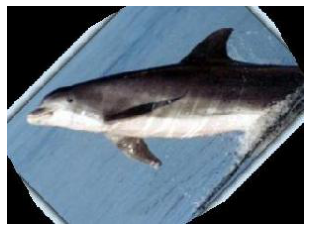

This Image is of a... dolphin


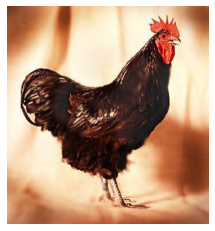

This Image is of a... rooster


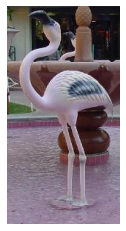

This Image is of a... flamingo


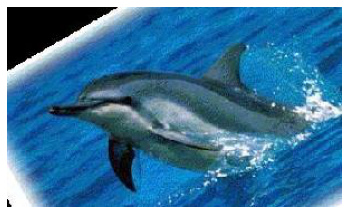

This Image is of a... dolphin


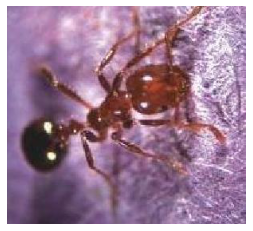

This Image is of a... ant


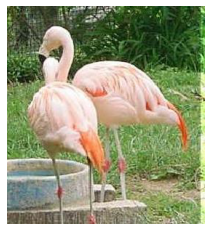

This Image is of a... flamingo


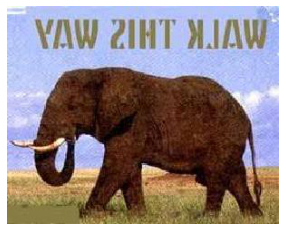

This Image is of a... elephant


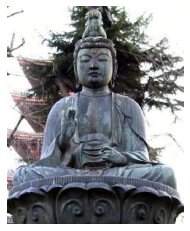

This Image is of a... budhha


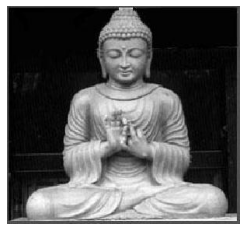

This Image is of a... budhha


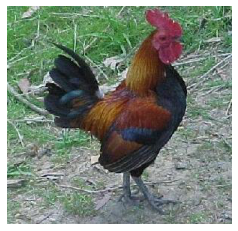

This Image is of a... rooster


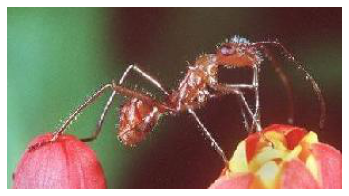

This Image is of a... ant


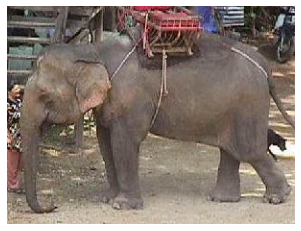

This Image is of a... elephant


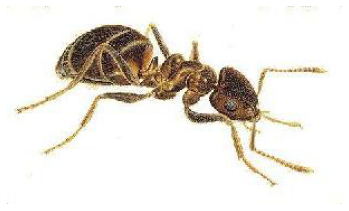

This Image is of a... ant


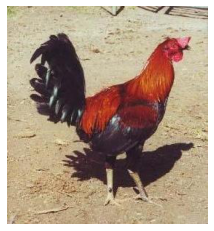

This Image is of a... rooster


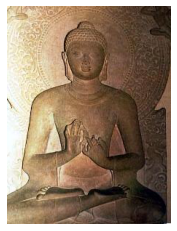

This Image is of a... budhha


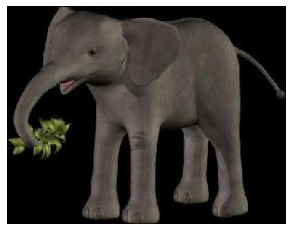

This Image is of a... elephant


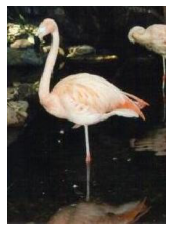

This Image is of a... flamingo


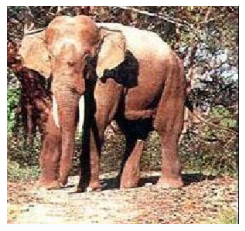

This Image is of a... elephant


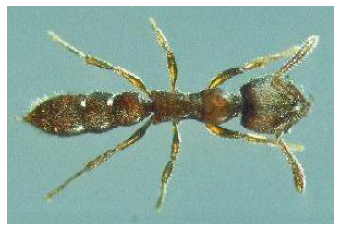

This Image is of a... ant


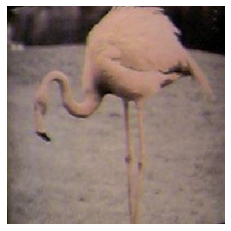

This Image is of a... flamingo


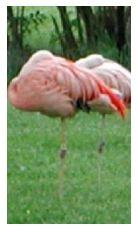

This Image is of a... flamingo


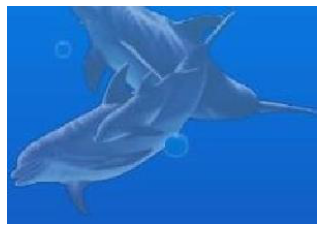

This Image is of a... dolphin


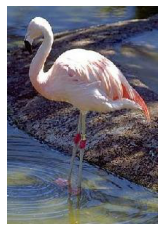

This Image is of a... flamingo


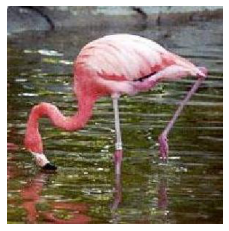

This Image is of a... flamingo


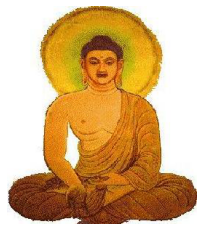

This Image is of a... budhha


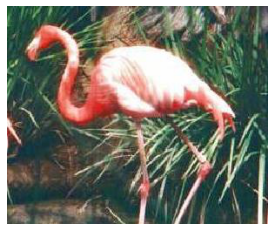

This Image is of a... flamingo


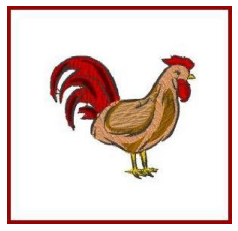

This Image is of a... rooster


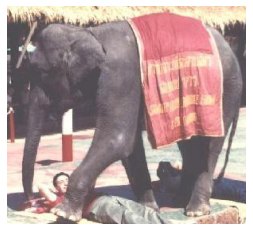

This Image is of a... elephant


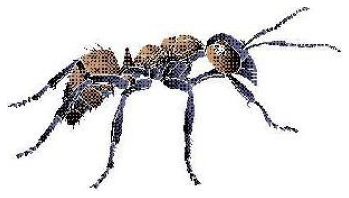

This Image is of a... ant


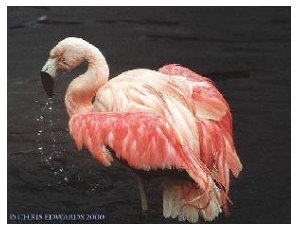

This Image is of a... flamingo


In [19]:
import random
import matplotlib.pyplot as plt

pred_dir = []
for d in os.listdir("/content/drive/MyDrive/dataset/"):
    for f in os.listdir("/content/drive/MyDrive/dataset/"+str(d)):
        pred_dir.append(str(d)+"/"+f)
pred_files = random.sample(pred_dir,30)
for f in pred_files:
    prediction("/content/drive/MyDrive/dataset/"+f)

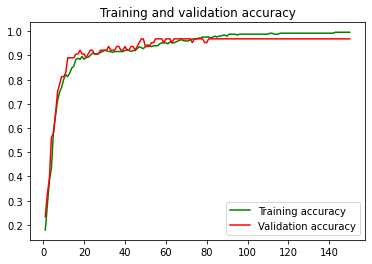

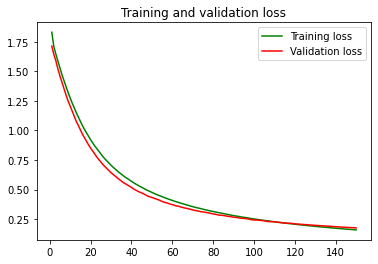

In [20]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
error_rate = (sum(acc)-sum(val_acc))
error_rate

0.25417280197143555

In [22]:
print("Accuracy = ",100 - error_rate)

Accuracy =  99.74582719802856


TRANSFER LEARNING : *Using Another Dataset to Find the Accuracy*